In [1]:
from matplotlib import rcParams
from cycler import cycler

rcParams["font.family"] = "Times New Roman"
rcParams["font.size"] = 12
rcParams['axes.prop_cycle'] = cycler(color='k')
#rcParams['figure.figsize'] = [4.0, 3.0]
#rcParams['figure.figsize'] = [1.5, 1.0]
print(rcParams['figure.figsize'])

import matplotlib.pyplot as plt
import csv
import numpy as np

def strip_ext(file_name):
    return file_name[:file_name.rfind('.')]

[6.4, 4.8]


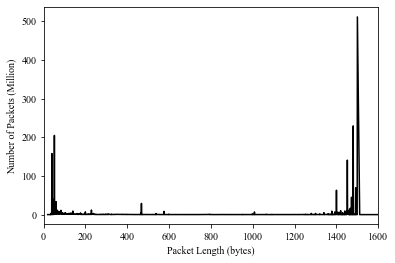

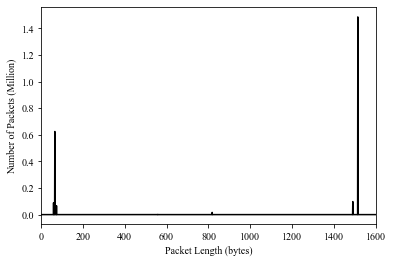

In [2]:
def draw_pkt_len(csv_file_name):
    x = []
    y = []
    with open(csv_file_name, newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        for row in csv_reader:
            x.append(int(row[0]))
            y.append(float(row[1]))

    plt.xlabel('Packet Length (bytes)')
    plt.ylabel('Number of Packets (Million)')
    plt.plot(x, y)
    plt.xlim(0, 1600)
    plt.savefig(f'{strip_ext(csv_file_name)}.pdf', bbox_inches='tight')
    plt.show()

draw_pkt_len('pkt_len_caida.csv')
draw_pkt_len('pkt_len_default.csv')

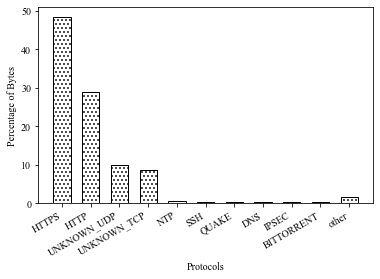

In [3]:
x = []
y = []
with open('ip_proto_caida.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        x.append(row[0])
        y.append(float(row[1]))

fig = plt.figure()
plt.xlabel('Protocols')
plt.ylabel('Percentage of Bytes')
plt.bar(x, y, width=0.6, color='w', hatch='...', edgecolor = 'k')
fig.autofmt_xdate()
plt.savefig('ip_proto_caida.pdf', bbox_inches='tight')
plt.show()

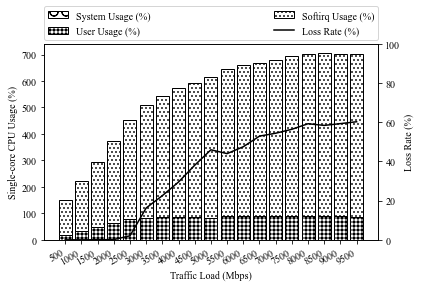

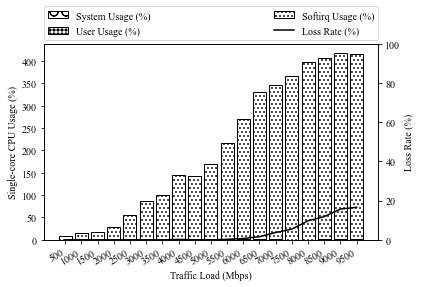

In [4]:
def draw_cpu_usage(csv_file_name):
    x = []
    sys = []
    user = []
    irq = []
    loss = []
    with open(csv_file_name, newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        for row in csv_reader:
            x.append(row[0])
            sys.append(float(row[1]))
            user.append(float(row[2]))
            irq.append(float(row[3]))
            loss.append(float(row[4]))

    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    lines = []
    lines.append(ax1.bar(x, sys, color='w', hatch = 'O', edgecolor = "k", label='System Usage (%)'))
    lines.append(ax1.bar(x, user, color='w', hatch = '+++', edgecolor = "k", bottom=sys, label='User Usage (%)'))
    lines.append(ax1.bar(x, irq, color='w', hatch='...', edgecolor = "k", bottom=np.array(sys)+np.array(user), label='Softirq Usage (%)'))
    lines.append(ax2.plot(x, loss, label='Loss Rate (%)')[0])
    
    labels = [line.get_label() for line in lines]

    fig.autofmt_xdate()
    ax1.set_xlabel('Traffic Load (Mbps)')
    ax1.set_ylabel('Single-core CPU Usage (%)')
    ax2.set_ylabel('Loss Rate (%)')
    #ax1.set_ylim(0, 800)
    ax2.set_ylim(0, 100)
    plt.legend(lines, labels, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0., fontsize=10)
    
    plt.savefig(f'{strip_ext(csv_file_name)}.pdf', bbox_inches='tight')

    plt.show()
    
draw_cpu_usage('cpu_usage_snort.csv')
draw_cpu_usage('cpu_usage_bpf.csv')

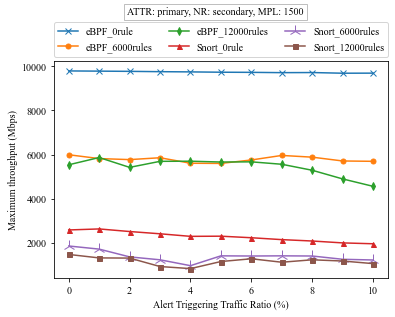

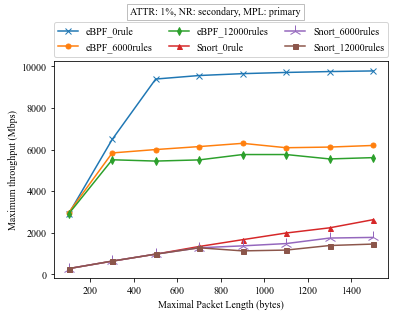

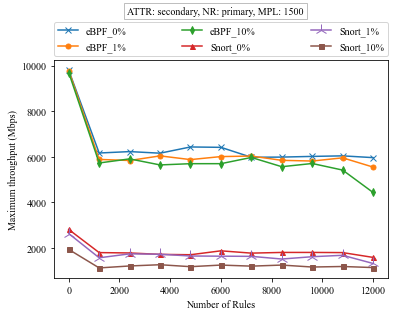

In [5]:
def draw_throughput(csv_file_name, primary_var, secondary_var):
    all_data = []
    with open(csv_file_name, newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        for row in csv_reader:
            all_data.append([float(i) for i in row])
            
    columns = np.array(all_data).transpose()
    #print(columns)
    
    line_labels = {'nrules': ('eBPF_0rule', 'eBPF_6000rules', 'eBPF_12000rules',
                         'Snort_0rule', 'Snort_6000rules', 'Snort_12000rules'), 
                       'malicious_ratio': ('eBPF_0%', 'eBPF_1%', 'eBPF_10%',
                         'Snort_0%', 'Snort_1%', 'Snort_10%')}
    line_styles = [
         ('loosely dotted',        (0, (1, 5))),
         ('dotted',                (0, (1, 1))),

         ('dashed',                (0, (5, 5))),
         ('densely dashed',        (0, (5, 1))),

         ('dashdotted',            (0, (3, 5, 1, 5))),
         ('densely dashdotted',    (0, (3, 1, 1, 1))),

         ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
         ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
         ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))
    ]
    markers = ['x', 'o', 'd', '^', '2', 's']
    marker_sizes = [6, 5, 5, 5, 12, 5]
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
    for i in range(1, 7):
        plt.plot(columns[0], columns[i], label=line_labels[secondary_var][i-1], color=colors[i-1],
                 linestyle='solid', marker=markers[i-1], markersize=marker_sizes[i-1])
    
    xlabels = {'nrules': 'Number of Rules', 
               'malicious_ratio': 'Alert Triggering Traffic Ratio (%)',
                'pkt_len': 'Maximal Packet Length (bytes)'}
    plt.xlabel(xlabels[primary_var])
    plt.ylabel('Maximum throughput (Mbps)')
    legend = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=10)
    
    val_text = {'malicious_ratio': '1%', 'nrules': '6000', 'pkt_len': '1500'}
    val_text[primary_var] = 'primary'
    val_text[secondary_var] = 'secondary'
    plt.figtext(0.5, 1.04, f'ATTR: {val_text["malicious_ratio"]}, NR: {val_text["nrules"]}, MPL: {val_text["pkt_len"]}', 
                horizontalalignment='center',
                fontsize=10,
                bbox={'facecolor': 'w', 'alpha': 0.5, 'pad': 3, 'edgecolor': 'grey'})
    plt.savefig(f'{strip_ext(csv_file_name)}.pdf', bbox_inches='tight')
    plt.show()
    

draw_throughput('mr_nrules.csv', 'malicious_ratio', 'nrules')
draw_throughput('pktlen_nrules.csv', 'pkt_len', 'nrules')
draw_throughput('nrules_mr.csv', 'nrules', 'malicious_ratio')

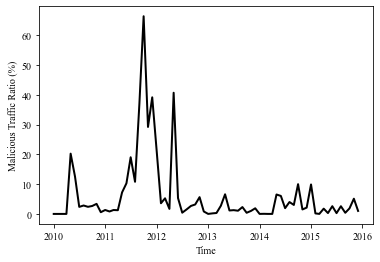

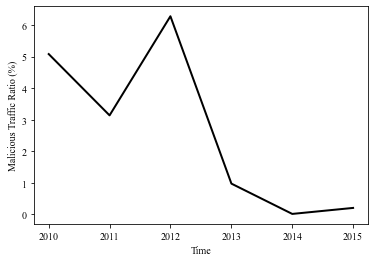

In [6]:
import json
import datetime

with open('all-years.json') as f:
    all_years = json.load(f)
    
def draw_month(all_years):
    x = []
    y = []
    for year in all_years:
        if int(year) < 2010:
            continue

        for month in all_years[year]:
            total = all_years[year][month]['total']
            detected = all_years[year][month]['detected']
            x.append(datetime.date(int(year), int(month), 1))
            y.append(detected/total*100)

    plt.xlabel('Time')
    plt.ylabel('Malicious Traffic Ratio (%)')
    plt.plot_date(x, y, linestyle='-', linewidth=2, marker=None)
    #plt.savefig('month.png', bbox_inches='tight')
    plt.show()
    
def draw_year(all_years):
    x = []
    y = []
    for year in all_years:
        if int(year) < 2010:
            continue

        total = 0
        detected = 0
        for month in all_years[year]:
            total += all_years[year][month]['total']
            detected += all_years[year][month]['detected']
        x.append(datetime.date(int(year), 1, 1))
        y.append(detected/total*100)

    plt.xlabel('Time')
    plt.ylabel('Malicious Traffic Ratio (%)')
    plt.plot_date(x, y, linestyle='-', linewidth=2, marker=None)
    #plt.savefig('year.png', bbox_inches='tight')
    plt.show()
    
draw_month(all_years)
draw_year(all_years)